# Birthday paradox

https://en.wikipedia.org/wiki/Birthday_problem

In [1]:
import csv
import numpy as np

from ipywidgets import interactive, fixed
from IPython.display import display

from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import (HoverTool, PanTool, SaveTool,
                          WheelZoomTool,
                          BoxZoomTool, CrosshairTool, HelpTool)
import matplotlib.pyplot as plt

%matplotlib inline

output_notebook()

DAYS_OF_YEAR = 366

Loading BokehJS ...

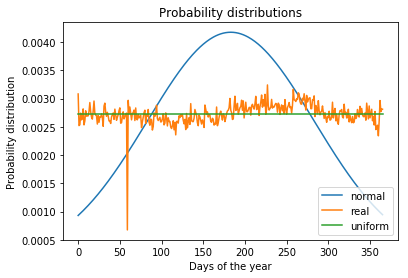

In [2]:
# Generates the probability distributions

# Parameters for normal distribution
MU = 183
SIGMA = 100

def _real_distribution():
    """
    Distribution of birthdays in a Calendar year:
    http://www.panix.com/~murphy/bday.html
    """
    result = np.arange(DAYS_OF_YEAR)
    with open('bdata.txt', 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        # Skip the header
        next(reader)
        for i, row in enumerate(reader):
            if row[0] == 'total':
                total_people = int(row[1])
                continue
            result[i] = int(row[1])
                    
    return result / total_people

def _normal(x, mu=0.0, sigma=1.0):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

def _normal_distribution():
    # Sometimes the probabilities do not sum perfectly to 1. Adjust it.
    temp_normal_distribution = _normal(np.arange(DAYS_OF_YEAR), mu=MU, sigma=SIGMA)
    residual = (1 - sum(temp_normal_distribution))/DAYS_OF_YEAR
    return [p + residual for p in temp_normal_distribution]

REAL_DISTRIBUTION = _real_distribution()
NORMAL_DISTRIBUTION = _normal_distribution()

_, axes_plot = plt.subplots()
plt.title('Probability distributions')
plt.xlabel('Days of the year')
plt.ylabel('Probability distribution')
axes_plot.plot(np.arange(DAYS_OF_YEAR), _normal_distribution(), label='normal')
axes_plot.plot(np.arange(DAYS_OF_YEAR), _real_distribution(), label='real')
axes_plot.plot(np.arange(DAYS_OF_YEAR), (1/DAYS_OF_YEAR) * np.ones(DAYS_OF_YEAR), label='uniform')
plt.legend(loc='lower right')
pass

In [3]:
def _select_distribution(distribution_name):
    if distribution_name == 'uniform':
        return None
    elif distribution_name == 'real':
        return REAL_DISTRIBUTION
    elif distribution_name == 'normal':
        return NORMAL_DISTRIBUTION
    else:
        raise ValueError('Unknown distribution')

def _compute(people, trials, days_of_year, distribution=None):
    buffer = np.zeros(people)
    for t in range(trials):
        for p in range(people):
            sample = np.random.choice(np.arange(days_of_year), size=p, p=distribution)
            if len(sample) != len(np.unique(sample)):
                buffer[p] += 1.0
    return buffer / trials

def _display(people, result):
    hover = HoverTool(tooltips=[
        ("number of people", "$index"),
        ("probability", "$y")
    ])
    plot = figure(x_axis_label='Number of people', y_axis_label='Probability of a pair',
                  tools=[hover, PanTool(), SaveTool(),
                          WheelZoomTool(),
                          BoxZoomTool(), CrosshairTool(line_color='lightgrey', line_width=.5), HelpTool(),])
    plot.line(np.arange(people), result)
    plot.circle(np.arange(people), result, fill_color='red', size=4)
    show(plot)

def birthday_paradox(people, trials, days_of_year, distribution_name='uniform'):
    distribution = _select_distribution(distribution_name)
    result = _compute(people, trials, days_of_year, distribution)
    _display(people , result)
    
    return (np.arange(people), result)

In [4]:
p = interactive(birthday_paradox, people=(1,100), trials=(1,1000),
                days_of_year=fixed(DAYS_OF_YEAR), distribution_name=['uniform', 'real', 'normal'])
display(p)

interactive(children=(IntSlider(value=50, description='people', min=1), IntSlider(value=500, description='tria…